In [1]:
import math
import numpy as np
import sympy as sm
from sympy import Derivative
from itertools import groupby
import matplotlib.pyplot as plt
from tabulate import tabulate
from pprint import pprint

from IPython.display import display, Latex, clear_output
#%matplotlib inline

In [2]:
sm.init_printing(use_latex='mathjax')
x, y, c = sm.symbols('x, y, c', real=True)
C1, C2 = sm.symbols("C1, C2", real=True)
c = sm.symbols("c")
u = sm.Function('u')
ux1 = Derivative(u(x), x)

In [3]:
zad1 = {'K': x**2,
        'f': 2*x**2 + 2*x,
        'a': 0.5, 'UA': 2,
        'b': 1.6, 'UB': 6}

zad0 = {'K': x,
        'f': x**(sm.Pow(3,-1))*4/3,
        'a': 0.5, 'UA': 1,
        'b': 1, 'UB': 2}

express = [
    lambda zad: {**zad, 'K':zad['K'], 'UA':zad['UA'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K']*c, 'UA':zad['UA'], 'UB':zad['UB'], 'c':2 },
    lambda zad: {**zad, 'K':zad['K']*c, 'UA':zad['UA'], 'UB':zad['UB'], 'c':0.1 },
    #lambda zad: {**zad, 'K':sm.Pow(zad['K'],-1), 'UA':zad['UA'], 'b':zad['b'], 'UB':zad['UB'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K'], 'UA':-zad['UA'], 'UB':zad['UB'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K'], 'UA':zad['UA'], 'UB':-zad['UB'], 'c':1 },
    lambda zad: {**zad, 'K':zad['K'], 'UA':-zad['UA'], 'UB':-zad['UB'], 'c':1 }
]

In [4]:
def getroots(expr, zad):
    tyt1 = sm.Eq(expr.rhs.subs(x, zad['a']), zad['UA'])
    tyt2 = sm.Eq(expr.rhs.subs(x, zad['b']), zad['UB'])
    sol = sm.solve((tyt1, tyt2), (C1, C2))
    return sol

def getresult(zad):
    rer = sm.Eq(Derivative(zad['K']*ux1, x), -zad['f'])
    #display(rer)
    
    res = sm.integrate(rer, x)
    res = sm.Eq(res.lhs, res.rhs + C1)
    
    res2 = sm.Eq(ux1, sm.solve(res, ux1)[0])
    
    res3 = sm.integrate(res2, x)
    res3 = sm.Eq(res3.lhs, res3.rhs + C2)
    
    res4 = res3.subs(c, zad['c'])
    
    sol = getroots(res4, zad)
    equation = res4.subs({C1:sol[C1], C2:sol[C2]})
    return equation
    #return [equation, sol]
    
def func1(zad, express):
    results = [getresult(expr(zad)) for expr in express]
    return results

In [5]:
results = func1(zad1, express[:3])
results2 = func1(zad1, express[3:])
display(*results)
display(*results2)

          2                                          
         x                           4.26909090909091
u(x) = - ── - x + 11.1215151515152 - ────────────────
         3                                  x        

          2                                          
         x    x                      3.58909090909091
u(x) = - ── - ─ + 9.46984848484849 - ────────────────
         6    2                             x        

                           2                               16.5090909090909
u(x) = - 3.33333333333333⋅x  - 10.0⋅x + 40.8515151515152 - ────────────────
                                                                  x        

          2                                         
         x                          7.17818181818182
u(x) = - ── - x + 12.939696969697 - ────────────────
         3                                 x        

          2                                         
         x                          4.45818181818182
u(x) = - ── - x - 6.3330303030303 + ────────────────
         3                                 x        

          2                                          
         x                           1.54909090909091
u(x) = - ── - x - 4.51484848484848 + ────────────────
         3                                  x        

# One

## Two

### Three

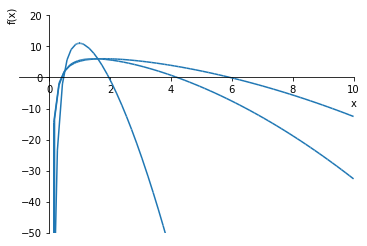

In [6]:
args = []
for ress in results:
    args.append( (ress.rhs, (x, 0.0001, 10)) )
plot = sm.plot(*args, xlim=[-1,10], ylim=[-50,20], show=False, Legend=False)
plot.show()

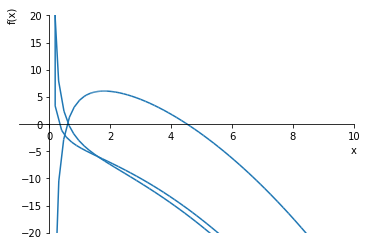

In [7]:
args = []
for ress in results2:
    args.append( (ress.rhs, (x, 0.0001, 10)) )
plot = sm.plot(*args, xlim=[-1,10], ylim=[-20,20], show=False, Legend=True)
plot.show()